In [1]:
cd

/Users/mdjavedulferdous


In [2]:
cd "Documents/Dataset/New Dataset"

/Users/mdjavedulferdous/Documents/Dataset/New Dataset


In [27]:
import csv
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from sklearn import svm
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold,cross_val_predict
from sklearn.metrics import precision_score,average_precision_score,confusion_matrix, recall_score, accuracy_score, classification_report, make_scorer
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as PLT


In [17]:
csv_df = pd.read_csv("final_2.csv")

In [18]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   search_innertext               803 non-null    int64 
 1   search_attribute               803 non-null    int64 
 2   Number_of_search_word          803 non-null    int64 
 3   search_button_attribute_value  803 non-null    int64 
 4   is_button                      803 non-null    int64 
 5   sClass                         803 non-null    int64 
 6   URL name                       803 non-null    object
dtypes: int64(6), object(1)
memory usage: 44.0+ KB


In [19]:
X = csv_df[['search_innertext','search_attribute','Number_of_search_word','search_button_attribute_value','is_button']]
y = csv_df[['sClass']]


In [20]:
filtered_one = csv_df[csv_df['sClass'] == 1] 
filtered_zero = csv_df[csv_df['sClass'] == 0] 

In [21]:
print(filtered_zero.count())
print(filtered_one.count())


search_innertext                 594
search_attribute                 594
Number_of_search_word            594
search_button_attribute_value    594
is_button                        594
sClass                           594
URL name                         594
dtype: int64
search_innertext                 209
search_attribute                 209
Number_of_search_word            209
search_button_attribute_value    209
is_button                        209
sClass                           209
URL name                         209
dtype: int64


In [22]:
f_o = filtered_zero.sample(n=209,replace=False)
y1 = pd.concat([filtered_one, f_o], axis=0)
x_2 = y1[['search_innertext','search_attribute','Number_of_search_word','search_button_attribute_value','is_button']]
y_2 = y1[["sClass"]]

In [23]:
pd.concat([f_o[["URL name"]], f_o[["sClass"]]], axis=1).to_csv('filtered_zero.csv')
pd.concat([filtered_one[["URL name"]], filtered_one[["sClass"]]], axis=1).to_csv('filtered_one.csv')

In [24]:
print(x_2.count())
print(y_2.count())

search_innertext                 418
search_attribute                 418
Number_of_search_word            418
search_button_attribute_value    418
is_button                        418
dtype: int64
sClass    418
dtype: int64


In [ ]:
def count_row(objt):
    file = open(objt)
    numline = len(file.readlines())-1
    print (numline)
count_row("filtered_one.csv")
count_row("filtered_zero.csv")


#### Prediction

In [25]:
cv = KFold(n_splits=4, random_state=1, shuffle=True)

model = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()

def classification_report_with_accuracy_score(y_true, y_pred):

    #print(y_true)
    #print(y_pred)
    #y_true = [1,1,1,0,0]
    #y_pred = [1,1,1,0,0]
    print (classification_report(y_true, y_pred)) # print classification report
    '''
    with open('y_true.csv', 'w') as csvfile:
        writer=csv.writer(csvfile, delimiter=',')
        writer.writerows(map(lambda x: [x], y_true))
    '''
    return accuracy_score(y_true, y_pred) # return accuracy score
'''
lgnested_score = cross_val_score(model, X=x_2, y=y_2, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
avg_score = "{:.3f}".format(np.mean(lgnested_score))
print(avg_score)



pred = cross_val_predict(model, x_2, y_2, cv=cv)
fold_pred = [pred[j] for i, j in cv.split(X,y)]
#print(fold_pred)
'''
print("========================================================")
print("LogisticRegression")
print("========================================================")
lgnested_score = cross_val_score(model, X=x_2, y=y_2, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
lgavg_score = "{:.3f}".format(np.mean(lgnested_score))
print("Average accuracy: ", lgavg_score)
print("========================================================")
print("DecisionTreeClassifier")
print("========================================================")
dtnested_score = cross_val_score(model2, X=x_2, y=y_2, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
dtavg_score = "{:.3f}".format(np.mean(dtnested_score))
print("Average accuracy: ", dtavg_score)
'''
print("========================================================")
print("RandomForestClassifier")
print("========================================================")
rfnested_score = cross_val_score(model3, X=x_2, y=y_2, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
rfavg_score = "{:.3f}".format(np.mean(lgnested_score))
print(rfavg_score)        
print("========================================================")
'''

LogisticRegression
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.89      0.91      0.90        46

    accuracy                           0.91       105
   macro avg       0.91      0.91      0.91       105
weighted avg       0.91      0.91      0.91       105

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        47
           1       0.98      0.90      0.94        58

    accuracy                           0.93       105
   macro avg       0.93      0.94      0.93       105
weighted avg       0.94      0.93      0.93       105

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        50
           1       0.94      0.87      0.90        54

    accuracy                           0.90       104
   macro avg       0.91      0.91      0.90       104
weighted avg       0.91      0.90      0.90       104



/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expec

'\nprint("========================================================")\nprint("RandomForestClassifier")\nprint("========================================================")\nrfnested_score = cross_val_score(model3, X=x_2, y=y_2, cv=cv,                scoring=make_scorer(classification_report_with_accuracy_score))\nrfavg_score = "{:.3f}".format(np.mean(lgnested_score))\nprint(rfavg_score)        \nprint("========================================================")\n'

In [ ]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Nested CV with parameter optimization
nested_score = cross_val_score(model, X=x_2, y=y_2, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
#print(classification_report(originalclass, predictedclass)) 
originalclassDF = pd.DataFrame(originalclass)
predictedclassDF = pd.DataFrame(predictedclass)
'''
with open('y1.csv', 'w') as csvfile:
        writer=csv.writer(csvfile, delimiter=',')
        writer.writerows(zip(originalclass,predictedclass))
'''


In [ ]:
originalclassDF, predictedclassDF

In [ ]:
y1[["URL name"]]

In [ ]:
a = pd.concat([originalclassDF,predictedclassDF,y1[["URL name"]]],join="inner", axis=1).to_csv("z1.csv")
a 

In [ ]:
y1[["URL name"]].to_csv('z2.csv')


In [ ]:
y1[["URL name"]].count()

In [ ]:
originalclassDF.count()

In [ ]:
y1[["URL name"]]

In [ ]:
file_name = "your_file_name.csv"

with open(file_name,'w') as f:
    for dt,int_norm,CSs in zip(y1[["URL name"]], originalclass,predictedclass):
        f.write('{0},{1},{2}\n'.format(dt,int_norm,CSs))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        60
           1       0.96      0.94      0.95        52

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        52
           1       0.94      0.86      0.90        59

    accuracy                           0.90       111
   macro avg       0.90      0.90      0.90       111
weighted avg       0.90      0.90      0.90       111

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        57
           1       0.96      0.93      0.94        54

    accuracy                           0.95       111
   macro avg       0.95      0.95      0.95       111
weighted avg       0.95      0.95      0.95       111

Accuracy for SVM is

/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was p

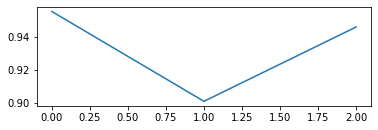

In [30]:
X_train,X_validation, Y_train, Y_validation = model_selection.train_test_split(x_2,y_2,test_size=0.20)
models = []
#models.append(('LogisticRegression', LogisticRegression()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', svm.SVC(kernel='rbf')))
results = []
names = []
print("================================================================")
for name, model in models:
    kfold = KFold(n_splits=3, random_state=0)
    clf = model.fit(X_train, Y_train)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
    results.append(cv_results)
    names.append(name)
    #print("================================================================")
    #print("Average scores of the estimator for each run of the cross validation.")
    #msg = "Testing score for %s: is %f" % (name, cv_results.mean()*100)
    #print(msg)
    print("================================================================")
    #print("The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.")
    print("Accuracy for %s is %f" % (name , accuracy_score(Y_validation, model.predict(X_validation))*100))
    print("================================================================")
    prediction = clf.predict(X_validation)
    print ('Recall:', recall_score(Y_validation, prediction))
    print ('Precision:', precision_score(Y_validation, prediction) )  
    fig = PLT.figure()
    ax1 = fig.add_subplot(211)
    ax1.plot(cv_results)
    PLT.show()